In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [2]:
dataset=pd.read_csv(r"C:\Users\Sakshi\OneDrive\Desktop\project\titanic.csv")
dataset.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
dataset.shape

(891, 12)

In [4]:
pd.set_option("display.max_rows",20)

In [5]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

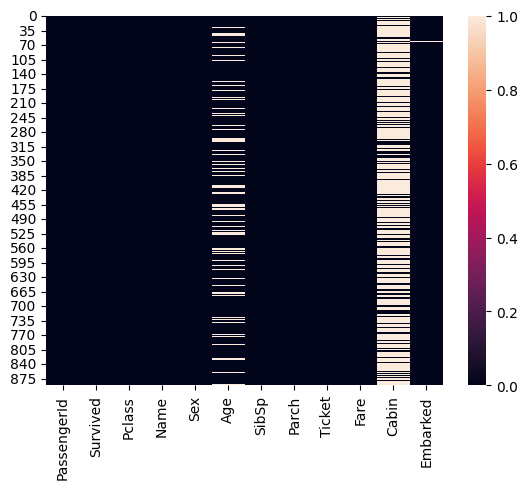

In [6]:
sns.heatmap(dataset.isnull())
plt.show()

In [7]:
dataset.fillna(method="bfill",inplace=True)

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_16060\4270340768.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method="bfill",inplace=True)


In [8]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B42,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,26.0,1,2,W./C. 6607,23.4500,C148,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
dataset.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
le=LabelEncoder()
categorical_data=dataset.select_dtypes(include=['object']).columns

for col in categorical_data:
    dataset[col]=le.fit_transform(dataset[col])

In [11]:
pd.set_option("display.max_rows",900)

In [12]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.00,1,0,523,7.2500,81,2
1,2,1,1,190,0,38.00,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.00,0,0,669,7.9250,55,2
3,4,1,1,272,0,35.00,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.00,0,0,472,8.0500,129,2
5,6,0,3,554,1,54.00,0,0,275,8.4583,129,1
6,7,0,1,515,1,54.00,0,0,85,51.8625,129,2
7,8,0,3,624,1,2.00,3,1,395,21.0750,145,2
8,9,1,3,412,0,27.00,0,2,344,11.1333,145,2
9,10,1,2,576,0,14.00,1,0,132,30.0708,145,0


In [13]:
x=dataset.iloc[:,:-1]
y=dataset["Embarked"]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=0.2)

In [16]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100,lr.score(x_train,y_train)*100

C:\Users\Sakshi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(71.50837988826815, 72.6123595505618)

In [17]:
new_data=[[891	,0,	3,	220,1,32.00,0,0,466,7.7500,147]]

In [18]:
lr.predict(new_data)

C:\Users\Sakshi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

# DecisionTree Classification

In [39]:
df={
    'criterion':["gini", "entropy", "log_loss"],
    'splitter':['best','random'],
    'max_depth':[i for i in range(2,20)],
}

In [40]:
rd=RandomizedSearchCV(DecisionTreeClassifier(),param_distributions=df,n_iter=5,cv=5,random_state=42)

In [41]:
rd.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=5,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'splitter': ['best', 'random']},
                   random_state=42)

In [42]:
dt=DecisionTreeClassifier(**rd.best_params_)

In [43]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [45]:
dt.score(x_test,y_test)*100

87.15083798882681

In [49]:
dt.predict(new_data)

C:\Users\Sakshi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

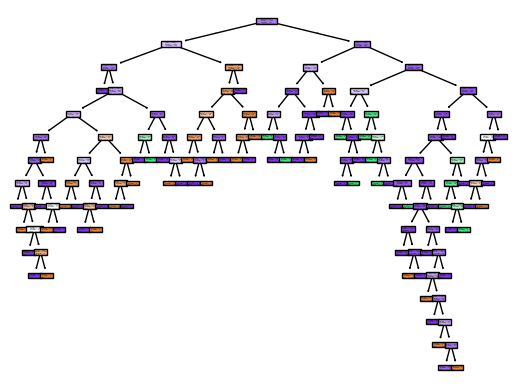

In [70]:
from sklearn import tree
tree.plot_tree(dt, filled=True, feature_names=x.columns)
plt.show()

# Svm

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=80)

In [106]:
ss=StandardScaler()

In [107]:
x_scaledtrain=ss.fit_transform(x_train)
x_scaledtest=ss.transform(x_test)

In [155]:
df1={
    "kernel":['rbf','linear','poly','sigmoid'],
    "degree":[3],
    "gamma":['scale','auto'],
    "coef0":[0.1,1,10],
    "shrinking":[True,False],
    "probability":[True,False],
    "tol":[0.001],
    "cache_size":[200],
    "verbose":[True,False],
    "decision_function_shape":['ovo', 'ovr'],
    "break_ties":[True,False]
    
    
}

In [156]:
rd1=RandomizedSearchCV(SVC(),param_distributions=df1,n_iter=5,cv=5,random_state=42)

In [157]:
    rd1.fit(x_scaledtrain,y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

C:\Users\Sakshi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Sakshi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\Sakshi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 472, in __call__
    return estimator.score(*args, **kwargs)
           ~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "C:\Users\Sakshi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 572, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ~~~~~~~~~~~~^^^
  File "C:\Users\Sakshi\AppData\Local\Programs\Python\Python31

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

C:\Users\Sakshi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.78634921 0.80333333        nan 0.80301587 0.78634921]
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=5,
                   param_distributions={'break_ties': [True, False],
                                        'cache_size': [200],
                                        'coef0': [0.1, 1, 10],
                                        'decision_function_shape': ['ovo',
                                                                    'ovr'],
                                        'degree': [3],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['rbf', 'linear', 'poly',
                                                   'sigmoid'],
                                        'probability': [True, False],
                                        'shrinking': [True, False],
                                        'tol': [0.001],
                                        'verbose': [True, False]},
                   random_state=42)

In [158]:
svc=SVC(**rd1.best_params_)

In [159]:
svc.fit(x_scaledtrain,y_train)

SVC(coef0=0.1, decision_function_shape='ovo', gamma='auto', kernel='poly',
    probability=True, shrinking=False)

In [160]:
svc.score(x_scaledtest,y_test)*100

71.24824684431978

In [161]:
svc.predict(x_scaledtest)

array([2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [162]:
# hence the decision tree model is best